In [184]:
## features - u_band, g_band, r_band, i_band, z_band, redshift
## targets - BH Mass

In [185]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [186]:
#reading data
df = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/clean_full_data_absma2g.csv')
df['ug'] = df.apply(lambda row: row.u_band - row.g_band,axis=1)
df['gr'] = df.apply(lambda row: row.g_band - row.r_band,axis=1)
df['ri'] = df.apply(lambda row: row.r_band - row.i_band,axis=1)
df['iz'] = df.apply(lambda row: row.i_band - row.z_band,axis=1)
df['zu'] = df.apply(lambda row: row.z_band - row.u_band,axis=1)
df = df.drop(columns = ['RA', 'DEC', 'ID', 'ERR', 'M_g','M_r','M_z', 'M_u', 'Unnamed: 0','mu','Mass_ground_truth','M_i'])
df.head(10)

,u_band,g_band,r_band,i_band,z_band,z,ug,gr,ri,iz,zu
0,18.982250,18.900643,18.596375,18.584750,18.720857,1.1875,0.081607,0.304268,0.011625,-0.136107,-0.261393
1,20.822754,20.706984,20.583098,20.400262,20.097541,2.0993,0.115770,0.123885,0.182836,0.302721,-0.725213
2,21.185649,20.891439,20.409386,20.336351,20.082965,1.1103,0.294211,0.482053,0.073035,0.253386,-1.102684
3,20.238111,19.877519,19.916019,19.845519,19.731352,0.6794,0.360593,-0.038500,0.070500,0.114167,-0.506759
4,17.895957,17.664872,17.407213,17.446128,17.437894,1.0459,0.231085,0.257660,-0.038915,0.008234,-0.458064
5,20.030270,19.890143,19.572317,19.534397,19.573444,1.2030,0.140127,0.317825,0.037921,-0.039048,-0.456825
6,18.721000,18.515000,18.543333,18.381000,17.800667,0.4122,0.206000,-0.028333,0.162333,0.580333,-0.920333
7,20.311204,19.343122,19.101469,18.716061,18.463020,1.7732,0.968082,0.241653,0.385408,0.253041,-1.848184
8,18.251062,17.960554,17.815600,17.734831,17.548046,2.1617,0.290508,0.144954,0.080769,0.186785,-0.703015
9,22.055582,20.204018,20.095018,20.165564,19.993800,2.9699,1.851564,0.109000,-0.070545,0.171764,-2.061782


In [187]:
# defining feature and target numpy arrays
X = df.iloc[:, [0,1,2,3,4]].values
y = df.iloc[:,5].values

In [188]:
# train test split
seed = np.random.seed()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = seed)

In [189]:
# normalizing features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test.shape)
print(y_test.shape)

(1372, 5)
(1372,)


In [190]:
# parameter tuning
# for i in range(1,100):
#     for j in range(1,4):
#         n_neighbors = i
#         classifier = KNeighborsRegressor(n_neighbors = n_neighbors, weights = 'uniform', p=j)
#         classifier.fit(X_train, y_train)
#         y_pred = classifier.predict(X_test)
#         rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#         r2 = metrics.r2_score(y_test, y_pred)
#         print(i,j,rmse,r2)
# for i in range(1,100):
#     for j in range(1,4):
#         n_neighbors = i
#         classifier = KNeighborsRegressor(n_neighbors = n_neighbors, weights = 'distance', p=j)
#         classifier.fit(X_train, y_train)
#         y_pred = classifier.predict(X_test)
#         rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#         r2 = metrics.r2_score(y_test, y_pred)
#         print(i,j,rmse,r2)

In [191]:
# KNN Regression Classifier
n_neighbors = 16
classifier = KNeighborsRegressor(n_neighbors = n_neighbors, weights = 'distance', p=2)
classifier.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                    weights='distance')

In [192]:
# Fitting
y_pred = classifier.predict(X_test)

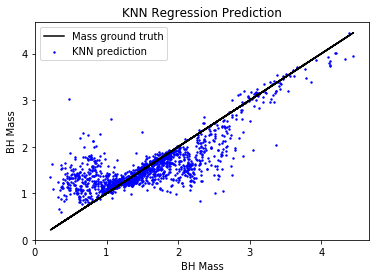

In [193]:
plt.plot(y_test, y_test, color = 'black', label = 'Mass ground truth')
plt.scatter(y_test, y_pred, color = 'blue', s=2, label = 'KNN prediction')
plt.xlabel('BH Mass')
plt.ylabel('BH Mass')
plt.legend()
plt.title('KNN Regression Prediction')
plt.show()

In [194]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 0.439920844796
r2 score: 0.624137102389


In [195]:
# color : RMSE ~ .375,.364,.369,.384
# color and bands : RMSE ~ .390, .388, .381, .389
# bands : RMSE ~ .417, .424, .435, .439